In [1]:
# Import needed libraries
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

# Train Data Set

In [2]:
# Reads in the data about flight prices from the Excel file from kaggle
trainDataSet = pd.read_excel(r"./flightPriceData_TrainSet.xlsx")

# Displays all of the columns inside the dataframe when this is printed
pd.set_option('display.max_columns', None)

In [3]:
# Displays the first 10 rows in the dataset
trainDataSet.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
# Displays information relating to each row.
trainDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Data Cleaning

In [5]:
# Checking for unique values in various columns
uniqueDurations = trainDataSet["Duration"].value_counts()
uniqueAirlines = trainDataSet["Airline"].value_counts()
uniqueSource = trainDataSet["Source"].value_counts()
uniqueDestination = trainDataSet["Destination"].value_counts()
uniqueRoutes = trainDataSet["Route"].value_counts()
uniqueTotalStops = trainDataSet["Total_Stops"].value_counts()

print(f"Unique Durations: {uniqueDurations}\n")
print(f"Unique Airlines: {uniqueAirlines}\n")
print(f"Unique Source: {uniqueSource}\n")
print(f"Unique Destination: {uniqueDestination}\n")
print(f"Unique Routes: {uniqueRoutes}\n")
print(f"Unique Total_Stops: {uniqueTotalStops}\n")

# Little useful data is included in the additional info section. Routes and Total Stops appear to be related so we can drop them.
trainDataSet.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

Unique Durations: Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

Unique Airlines: Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

Unique Source: Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

Unique Destination: Destination
Cochin       4537
Banglore     2871
Delhi     

In [6]:
# Drops any rows that contain missing values and then prints the output of rows that were needed to be removed.
trainDataSet.dropna(inplace = True)
trainDataSet.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

# EDA For Train Dataset

In [7]:
# Retrieves the month and day from the data set from the date and pushes them into their own columns and prints the new table
trainDataSet["Journey_Month"] = pd.to_datetime(trainDataSet["Date_of_Journey"], format = "%d/%m/%Y").dt.month
trainDataSet["Journey_Day"] = pd.to_datetime(trainDataSet.Date_of_Journey, format = "%d/%m/%Y").dt.day
trainDataSet.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1


In [8]:
# Drop the "Date_of_Journey" column since its no longer needed. We now have our new columns Journey_Day and Journey_Month
trainDataSet.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [9]:
# Retrieves the hours and minute from the data set from the date and pushes them into their own columns and prints the new table
trainDataSet["Departure_Hour"] = pd.to_datetime(trainDataSet["Dep_Time"], format = "%H:%M").dt.hour
trainDataSet["Departure_Minute"] = pd.to_datetime(trainDataSet["Dep_Time"], format = "%H:%M").dt.minute
trainDataSet.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1,16,50


In [10]:
# Drop the "Dep_Time" column since its no longer needed. We now have our new columns Departure_Hour and Departure_Minute
trainDataSet.drop(["Dep_Time"], axis = 1, inplace = True)

In [11]:
# Create 'Arrival_Hour' and 'Arrival_Minute' columns
trainDataSet["Arrival_Hour"] = pd.to_datetime(trainDataSet.Arrival_Time).dt.hour
trainDataSet["Arrival_Minute"] = pd.to_datetime(trainDataSet.Arrival_Time).dt.minute

trainDataSet.head(10)

C:\Users\b_bow\AppData\Local\Temp\ipykernel_7880\1118566396.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trainDataSet["Arrival_Hour"] = pd.to_datetime(trainDataSet.Arrival_Time).dt.hour
C:\Users\b_bow\AppData\Local\Temp\ipykernel_7880\1118566396.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trainDataSet["Arrival_Minute"] = pd.to_datetime(trainDataSet.Arrival_Time).dt.minute


,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,3,1,16,50,21,35
5,SpiceJet,Kolkata,Banglore,11:25,2h 25m,non-stop,3873,6,24,9,0,11,25
6,Jet Airways,Banglore,New Delhi,10:25 13 Mar,15h 30m,1 stop,11087,3,12,18,55,10,25
7,Jet Airways,Banglore,New Delhi,05:05 02 Mar,21h 5m,1 stop,22270,3,1,8,0,5,5
8,Jet Airways,Banglore,New Delhi,10:25 13 Mar,25h 30m,1 stop,11087,3,12,8,55,10,25
9,Multiple carriers,Delhi,Cochin,19:15,7h 50m,1 stop,8625,5,27,11,25,19,15


In [12]:
# Drop the "Arrival_Time" column since its no longer needed. We now have our new columns Arrival_Hour and Arrival_Minute
trainDataSet.drop(["Arrival_Time"], axis = 1, inplace = True)

In [13]:
# Retrieves the hours and minute from the data set from the duration and pushes them into their own columns and prints the new table
duration = list(trainDataSet["Duration"])
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    # Check if duration contains only hour or mins
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            # Accounts for 0 minutes
            duration[i] = duration[i].strip() + " 0m"
        else:
            # Accounts for 0 hours
            duration[i] = "0h " + duration[i]

# Retrieves the hours and minutes and pushes them into the array
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

# Updates the new columns
trainDataSet["Duration_hours"] = duration_hours
trainDataSet["Duration_mins"] = duration_mins

# Display the new columns
trainDataSet.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45


In [14]:
# Drop the "Duration" column since its no longer needed. We now have our new columns Arrival_Hour and Arrival_Minute
trainDataSet.drop(["Duration"], axis = 1, inplace = True)

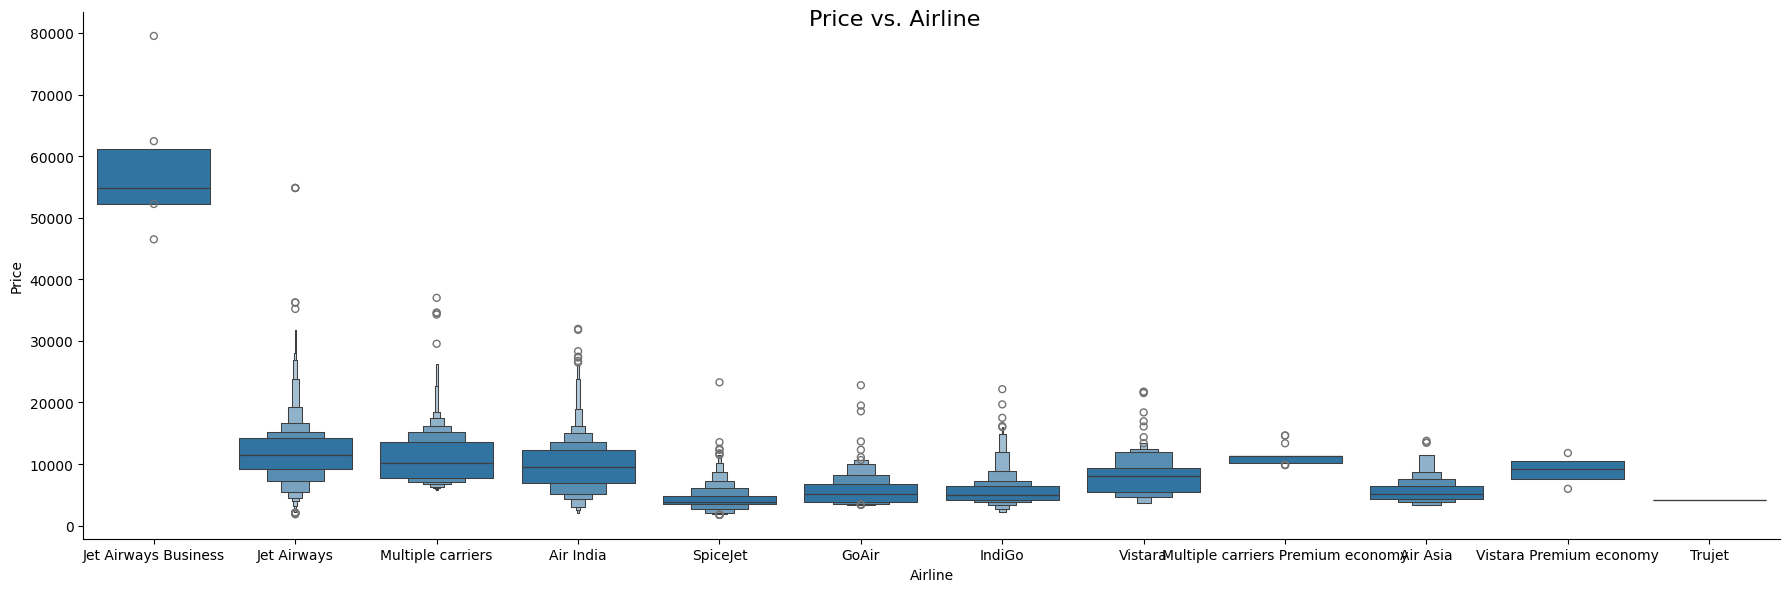

In [15]:
# Explore the distribution of prices based on airline
catPlot = sns.catplot(y = "Price", x = "Airline", data = trainDataSet.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
catPlot.fig.suptitle('Price vs. Airline', fontsize=16)
plt.show()

In [16]:
# Performs OneHotEncoding and processes the categorical columns for the airlines
Airline = trainDataSet[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


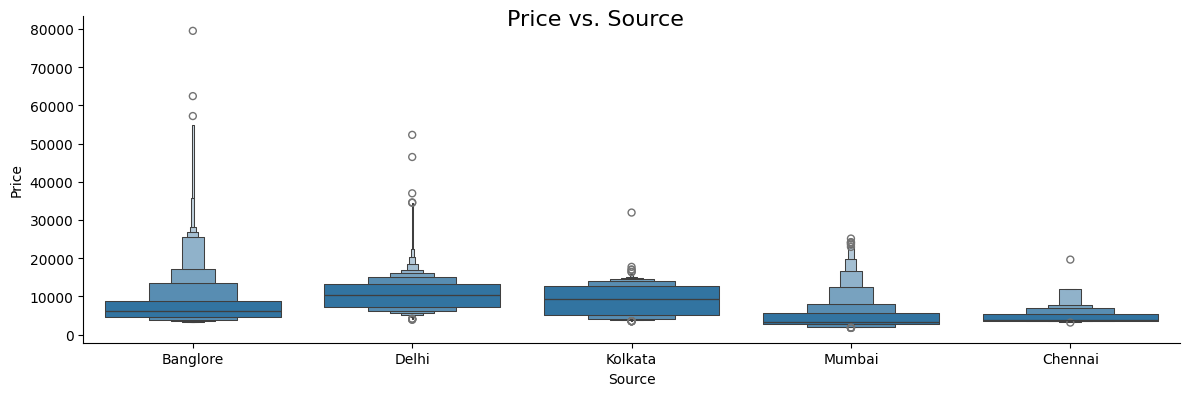

In [17]:
# Explore the distribution of the source based on the price
catPlot2 = sns.catplot(y = "Price", x = "Source", data = trainDataSet.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
catPlot2.fig.suptitle('Price vs. Source', fontsize=16)
plt.show()

In [18]:
# Performs OneHotEncoding and processes the categorical columns for the source
Source = trainDataSet[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [19]:
# Performs OneHotEncoding and processes the categorical columns for the destination
Destination = trainDataSet[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [20]:
# Perform a LabelEncoder and assign to key value pairs.
trainDataSet.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
trainDataSet.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


In [21]:
# Joins the columns together
trainDataSet = pd.concat([trainDataSet, Airline, Source, Destination], axis = 1)
trainDataSet.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [22]:
# Drop the Destination, Source, and Airline columns since they are no longer needed.
trainDataSet.drop(["Destination", "Source", "Airline"], axis = 1, inplace = True)
trainDataSet.head()

,Total_Stops,Price,Journey_Month,Journey_Day,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,5,1,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,6,9,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,5,12,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,3,1,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [23]:
# Returns the shape of the resulting data frame
trainDataSet.shape

(10682, 30)

# Test Data Set

In [24]:
testDataSet = pd.read_excel(r"./flightPriceData_TestSet.xlsx") # Reads in the data about flight prices from the Excel file from kaggle
testDataSet.head(10) # Displays the first 10 rows in the dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


# Data Cleaning

In [25]:
# Checking for unique values in various columns
uniqueDurations = testDataSet["Duration"].value_counts()
uniqueAirlines = testDataSet["Airline"].value_counts()
uniqueSource = testDataSet["Source"].value_counts()
uniqueDestination = testDataSet["Destination"].value_counts()
uniqueRoutes = testDataSet["Route"].value_counts()
uniqueTotalStops = testDataSet["Total_Stops"].value_counts()

print(f"Unique Durations: {uniqueDurations}\n")
print(f"Unique Airlines: {uniqueAirlines}\n")
print(f"Unique Source: {uniqueSource}\n")
print(f"Unique Destination: {uniqueDestination}\n")
print(f"Unique Routes: {uniqueRoutes}\n")
print(f"Unique Total_Stops: {uniqueTotalStops}\n")

# Little useful data is included in the additional info section. Routes and Total Stops appear to be related so we can drop them.
testDataSet.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

Unique Durations: Duration
2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
30h 45m      1
32h 5m       1
32h 20m      1
28h 55m      1
5m           1
Name: count, Length: 320, dtype: int64

Unique Airlines: Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64

Unique Source: Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64

Unique Destination: Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata  

In [26]:
# Drop rows with missing values in the test dataset
testDataSet.dropna(inplace = True)
print(testDataSet.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
dtype: int64


# EDA for Test Dataset

In [27]:
# Splits the Date_of_Journey into two new columns called Journey_Month and Journey_Day then drops the original column since it's not longer needed
try:
    testDataSet["Journey_Month"] = pd.to_datetime(testDataSet["Date_of_Journey"], format = "%d/%m/%Y").dt.month
    testDataSet["Journey_Day"] = pd.to_datetime(testDataSet.Date_of_Journey, format="%d/%m/%Y").dt.day
    testDataSet.drop(["Date_of_Journey"], axis = 1, inplace = True)
except ValueError:
    # Handle cases where the format doesn't match
    print("Some entries in 'Date_of_Journey' column do not match the expected format.")

testDataSet.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Journey_Month,Journey_Day
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,6,6
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1 stop,5,12
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,5,21
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1 stop,5,21
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,6,24


In [28]:
# Splits the Dep_Time into two new columns called Departure_Hour and Departure_Minute then drops the original column since it's not longer needed
try:
    testDataSet["Departure_Hour"] = pd.to_datetime(testDataSet["Dep_Time"], format="%H:%M").dt.hour
    testDataSet["Departure_Minute"] = pd.to_datetime(testDataSet["Dep_Time"], format="%H:%M").dt.minute
    testDataSet.drop(["Dep_Time"], axis = 1, inplace = True)
except ValueError:
    # Handle cases where the format doesn't match
    print("Some entries in 'Dep_Time' column do not match the expected format.")

testDataSet.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Journey_Month,Journey_Day,Departure_Hour,Departure_Minute
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,10h 55m,1 stop,6,6,17,30
1,IndiGo,Kolkata,Banglore,10:20,4h,1 stop,5,12,6,20
2,Jet Airways,Delhi,Cochin,19:00 22 May,23h 45m,1 stop,5,21,19,15
3,Multiple carriers,Delhi,Cochin,21:00,13h,1 stop,5,21,8,0
4,Air Asia,Banglore,Delhi,02:45 25 Jun,2h 50m,non-stop,6,24,23,55


In [29]:
# Splits the Arrival_Time into two new columns called Arrival_Hour and Arrival_Minute then drops the original column since it's not longer needed
testDataSet["Arrival_Hour"] = pd.to_datetime(testDataSet.Arrival_Time).dt.hour
testDataSet["Arrival_Minute"] = pd.to_datetime(testDataSet.Arrival_Time).dt.minute

testDataSet.head()

C:\Users\b_bow\AppData\Local\Temp\ipykernel_7880\1345058048.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  testDataSet["Arrival_Hour"] = pd.to_datetime(testDataSet.Arrival_Time).dt.hour
C:\Users\b_bow\AppData\Local\Temp\ipykernel_7880\1345058048.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  testDataSet["Arrival_Minute"] = pd.to_datetime(testDataSet.Arrival_Time).dt.minute


,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Journey_Month,Journey_Day,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,10h 55m,1 stop,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,10:20,4h,1 stop,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,19:00 22 May,23h 45m,1 stop,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,21:00,13h,1 stop,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,02:45 25 Jun,2h 50m,non-stop,6,24,23,55,2,45


In [30]:
# Splits the Duration into two new columns called Duration_hours and Duration_mins then drops the original column since it's not longer needed
duration = list(testDataSet["Duration"])
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    # Check if duration contains only hour or mins
    if len(duration[i].split()) != 2:
        # Accounts for 0 minutes
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
         # Accounts for 0 hours
        else:
            duration[i] = "0h " + duration[i]

# Retrieves the hours and minutes and pushes them into the array
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

# Updates the new columns
testDataSet["Duration_hours"] = duration_hours
testDataSet["Duration_mins"] = duration_mins

# Dsiplay the new column
testDataSet.head(10)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Journey_Month,Journey_Day,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,10h 55m,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,10:20,4h,1 stop,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,19:00 22 May,23h 45m,1 stop,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,21:00,13h,1 stop,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,02:45 25 Jun,2h 50m,non-stop,6,24,23,55,2,45,2,50
5,Jet Airways,Delhi,Cochin,12:35 13 Jun,18h 20m,1 stop,6,12,18,15,12,35,18,20
6,Air India,Banglore,New Delhi,22:35,15h 5m,1 stop,3,12,7,30,22,35,15,5
7,IndiGo,Kolkata,Banglore,20:30,5h 15m,1 stop,5,1,15,15,20,30,5,15
8,IndiGo,Kolkata,Banglore,12:55,2h 45m,non-stop,3,15,10,10,12,55,2,45
9,Jet Airways,Kolkata,Banglore,22:35,6h 5m,1 stop,5,18,16,30,22,35,6,5


In [31]:
# Drop the "Duration" column since its no longer needed. We now have our new columns Arrival_Hour and Arrival_Minute
testDataSet.drop(["Duration"], axis = 1, inplace = True)

In [32]:
# Categorical data
Airline = testDataSet[["Airline"]]
Airline = pd.get_dummies(testDataSet["Airline"], drop_first= True)

Source = testDataSet[["Source"]]
Source = pd.get_dummies(testDataSet["Source"], drop_first= True)

Destination = testDataSet[["Destination"]]
Destination = pd.get_dummies(testDataSet["Destination"], drop_first = True)


# Replacing Total_Stops
testDataSet.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> testDataSet + Airline + Source + Destination
testData = pd.concat([testDataSet, Airline, Source, Destination], axis = 1)

testData.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
print("Shape of test data : ", testData.shape)
testData.head(10)

Shape of test data :  (2671, 29)


,Arrival_Time,Total_Stops,Journey_Month,Journey_Day,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,04:25 07 Jun,1,6,6,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,10:20,1,5,12,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,19:00 22 May,1,5,21,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,21:00,1,5,21,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,02:45 25 Jun,0,6,24,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,12:35 13 Jun,1,6,12,18,15,12,35,18,20,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
6,22:35,1,3,12,7,30,22,35,15,5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
7,20:30,1,5,1,15,15,20,30,5,15,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
8,12:55,0,3,15,10,10,12,55,2,45,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
9,22:35,1,5,18,16,30,22,35,6,5,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


# Feature Selection

In [33]:
# Lists all the columns inside of the train dataset
testData.columns

Index(['Arrival_Time', 'Total_Stops', 'Journey_Month', 'Journey_Day',
       'Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_hours', 'Duration_mins', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [34]:
# Locates the columns with these label names and prints them
X = trainDataSet.loc[:, ['Total_Stops', 'Journey_Day', 'Journey_Month', 'Departure_Hour',
       'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_Day,Journey_Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [35]:
# Looks for the values at index 1 and prints them
y = trainDataSet.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [36]:
numericalData = trainDataSet.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numericalData.corr()

# Display the textual correlation matrix
print("Textual Correlation Matrix:")
print("-" * 30)
print("Overall Correlation Matrix")
print(correlation_matrix)

# Loop through each column and its correlation with other columns
for column in correlation_matrix.columns:
    correlation_values = correlation_matrix[column].round(2)
    print(f"\nCorrelation with '{column}':\n")
    print(correlation_values)
    print("-" * 30)

Textual Correlation Matrix:
------------------------------
Overall Correlation Matrix
                Total_Stops     Price  Duration_hours  Duration_mins
Total_Stops        1.000000  0.603897        0.739916      -0.136706
Price              0.603897  1.000000        0.508778      -0.124855
Duration_hours     0.739916  0.508778        1.000000      -0.126468
Duration_mins     -0.136706 -0.124855       -0.126468       1.000000

Correlation with 'Total_Stops':

Total_Stops       1.00
Price             0.60
Duration_hours    0.74
Duration_mins    -0.14
Name: Total_Stops, dtype: float64
------------------------------

Correlation with 'Price':

Total_Stops       0.60
Price             1.00
Duration_hours    0.51
Duration_mins    -0.12
Name: Price, dtype: float64
------------------------------

Correlation with 'Duration_hours':

Total_Stops       0.74
Price             0.51
Duration_hours    1.00
Duration_mins    -0.13
Name: Duration_hours, dtype: float64
------------------------------

C

<Axes: >

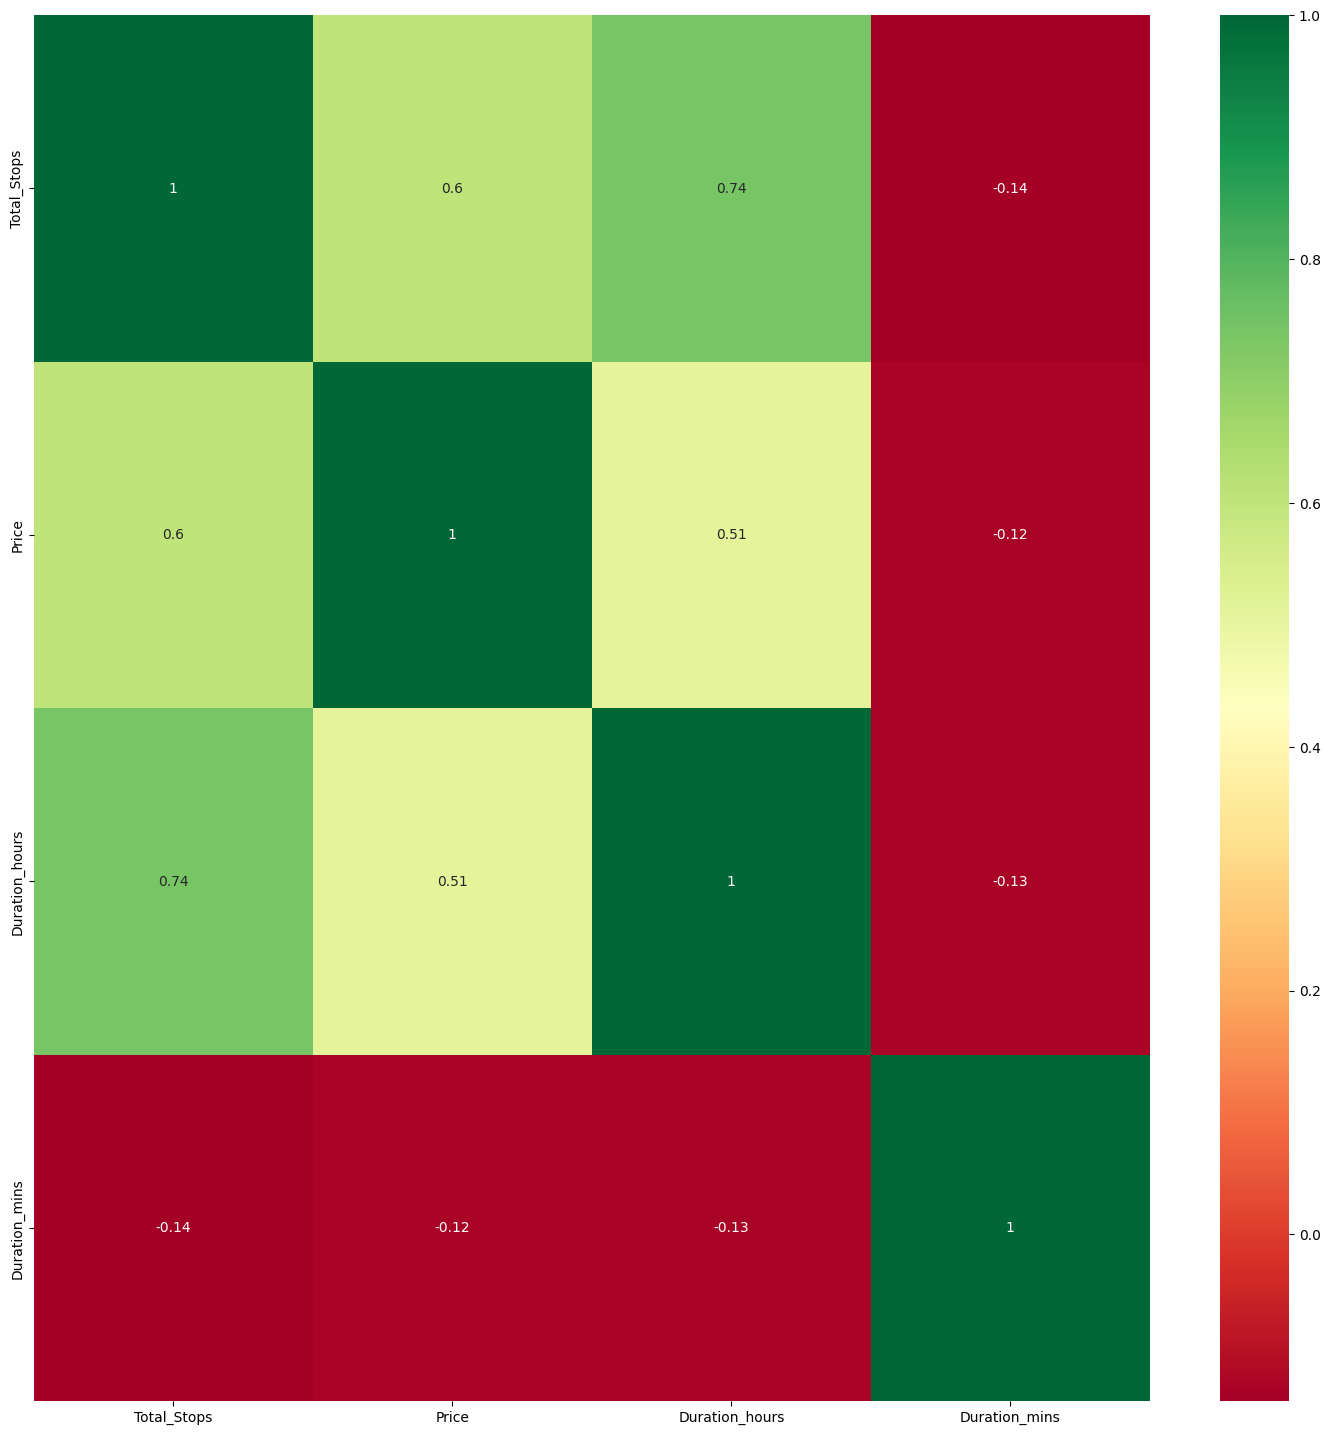

In [37]:
# Creates a correlation matrix and heatmap around the total stops, price, duration hours and duration minutes
plt.figure(figsize = (18,18))
sns.heatmap(numericalData.corr(), annot = True, cmap = "RdYlGn")

In [38]:
# Selects a feature using the ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(f"Feature Importances: \n{selection.feature_importances_}")

Feature Importances: 
[2.01544410e-01 1.42585203e-01 5.39393953e-02 2.38749856e-02
 2.14033512e-02 2.74718818e-02 2.00433013e-02 1.48520618e-01
 1.76489955e-02 1.13726469e-02 1.76102900e-03 1.76780646e-02
 1.35853900e-01 6.72214680e-02 2.01091829e-02 8.98629062e-04
 2.87381608e-03 8.78785631e-05 5.30787946e-03 8.19658750e-05
 4.86833458e-04 1.03712545e-02 3.44509696e-03 6.96132404e-03
 9.70499871e-03 1.66306935e-02 6.77223288e-03 5.53726922e-04
 2.47952363e-02]


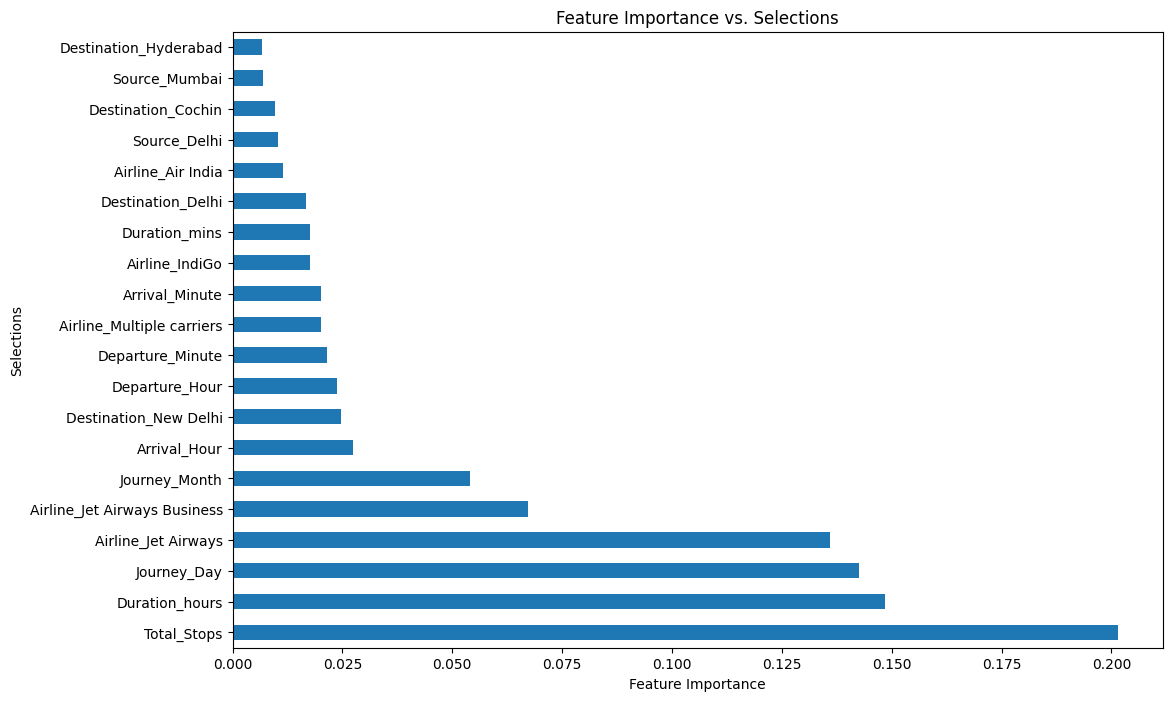

In [39]:
# Plots the feature importances
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature Importance vs. Selections")
plt.xlabel("Feature Importance")
plt.ylabel("Selections")
plt.show()

Fitting to random forest

In [40]:
# Splits the data into training and testing sets using a RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
regressorRandomForest = RandomForestRegressor()
regressorRandomForest.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
# Generates predictions based on the test set
y_pred = regressorRandomForest.predict(X_test)

# Scores the model predictions
trainedRegRfScore = regressorRandomForest.score(X_train, y_train)
testRegRfScore = regressorRandomForest.score(X_test, y_test)

# Prints the random forest regressor scores
print("Trained Random Forest Regressor Score: ", trainedRegRfScore)
print("Test Random Forest Regressor Score: ", testRegRfScore)

Trained Random Forest Regressor Score:  0.9540607227789157
Test Random Forest Regressor Score:  0.7970429101802816


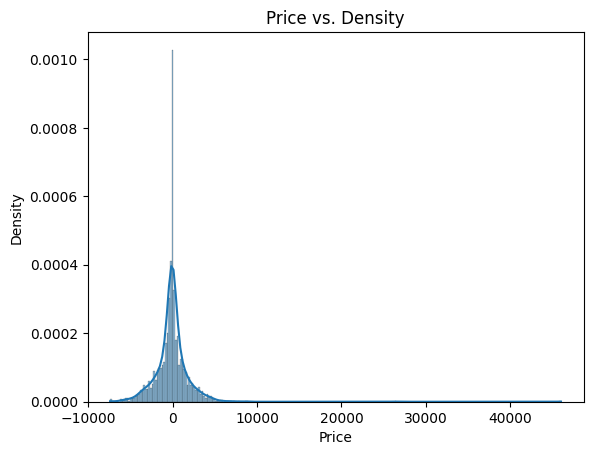

In [42]:
sns.histplot(y_test - y_pred, kde = True, stat = "density")
plt.title("Price vs. Density")
plt.show()

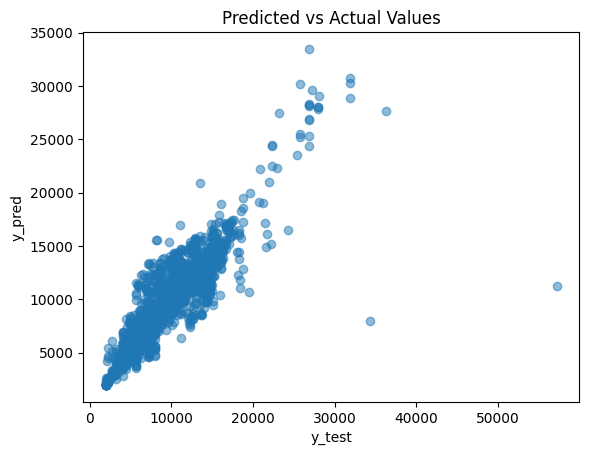

In [43]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.title("Predicted vs Actual Values")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [44]:
# Calculates the various error rates
meanAbsoluteError = metrics.mean_absolute_error(y_test, y_pred)
meanSquaredError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSquaredError = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {meanAbsoluteError}")
print(f"Mean Squarerd Error: {meanSquaredError}")
print(f"Root Mean Squared Error: {rootMeanSquaredError}")

normalizedRootMeanSquaredError = rootMeanSquaredError/(max(y)-min(y))
rsquaredScore = metrics.r2_score(y_test, y_pred)

print(f"Normalized Root Mean Squared Score: {normalizedRootMeanSquaredError}")
print(f"R-Squared Score: {rsquaredScore}")

Mean Absolute Error: 1178.6334999922346
Mean Squarerd Error: 4376172.20208073
Root Mean Squared Error: 2091.9302574609724
Normalized Root Mean Squared Score: 0.02690481727342961
R-Squared Score: 0.7970429101802816


# HyperParameter Tuning

In [45]:
# Defines the overall search space
numberOfEstimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Features being considered
featureTypes = ['sqrt', 'log2']

# Depth of the tree is set to the number of levels deep the tree is
maxDepth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Samples needed to split nodes
sampleSplits = [2, 5, 10, 15, 100]

# Samples needed to reach leaf nodes
sampleLeafs = [1, 2, 5, 10]

# Generates a random grid we can use for our param distributions in RSCV
random_grid = {'n_estimators': numberOfEstimators,
               'max_features': featureTypes,
               'max_depth': maxDepth,
               'min_samples_split': sampleSplits,
               'min_samples_leaf': sampleLeafs}

# Generates a random forest regressor instance
randomForestRegressor = RandomizedSearchCV(estimator = regressorRandomForest, param_distributions = random_grid,scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

# Fits a model with the training data.
randomForestRegressor.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=500; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=500; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

# Results

Best Hyperparameters: {'n_estimators': 900, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Prediction: [16437.89718292  6166.19599433  8608.05474884 ...  6747.63251805
 12133.25899572 12403.41045079]


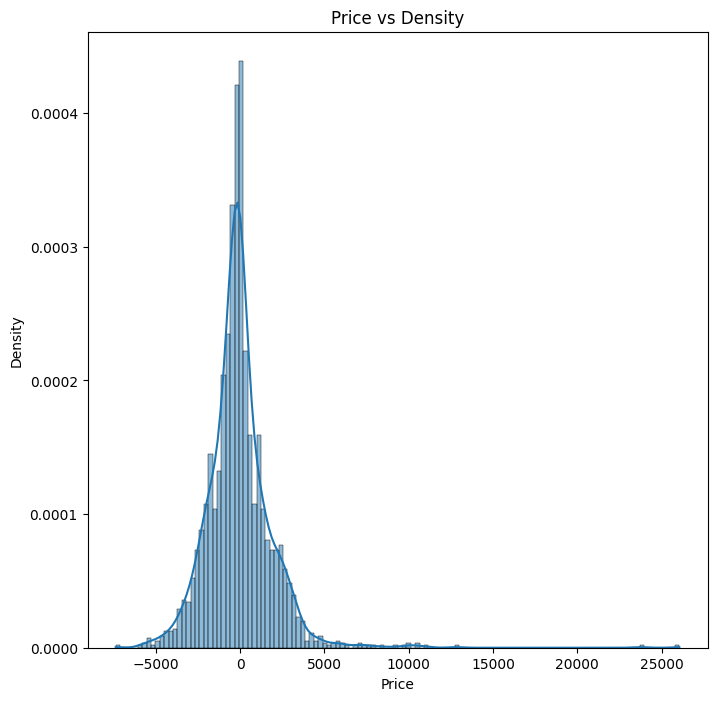

In [46]:
# Best Hyperparameters based on the random forest regressor
bestParamsRandomForest = randomForestRegressor.best_params_
print(f"Best Hyperparameters: {bestParamsRandomForest}")

# Prediction based on the test data set
prediction = randomForestRegressor.predict(X_test)
print(f"Prediction: {prediction}")

plt.figure(figsize = (8,8))
sns.histplot(y_test - prediction, kde = True, stat = "density")
plt.title("Price vs Density")
plt.show()


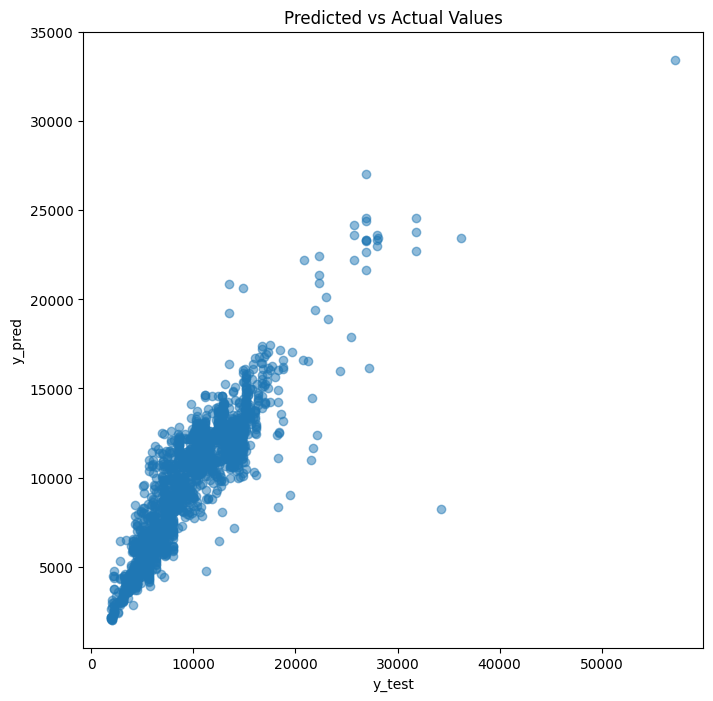

In [47]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.title("Predicted vs Actual Values")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [48]:
# Model Accuracy with the tuned hyperparameters
meanAbsoluteError = metrics.mean_absolute_error(y_test, prediction)
meanSquaredError = metrics.mean_squared_error(y_test, prediction)
rootMeanSquaredError = np.sqrt(metrics.mean_squared_error(y_test, prediction))

print(f'Mean Absolute Error: {meanAbsoluteError}')
print(f'Mean Squarerd Error: {meanSquaredError}')
print(f'Root Mean Squared Error: {rootMeanSquaredError}')

normalizedRootMeanSquaredError = rootMeanSquaredError/(max(y)-min(y))
rsquaredScore = metrics.r2_score(y_test, prediction)

print(f"Normalized Root Mean Squared Score: {rootMeanSquaredError/(max(y)-min(y))}")
print(f"R-Squared Score: {metrics.r2_score(y_test, prediction)}")

Mean Absolute Error: 1292.9847095396894
Mean Squarerd Error: 3932868.1457927576
Root Mean Squared Error: 1983.1460223071717
Normalized Root Mean Squared Score: 0.025505717108113793
R-Squared Score: 0.8176023619145404
